In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [27]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
#from model_equations_separate_NC import *
from model_equations_separate_NC_store_numba import *


In [29]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Np', 'Bh','Nh',  'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Cp', 'Bh[C]', 'Ch', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [30]:

 
sns.color_palette([PCOLOR, HCOLOR, PCOLOR_light, HCOLOR_light] )


In [31]:
dpath = '/fast_data/Osnat/RECYCLE_MODEL/results/shgo/out'

In [32]:
os.listdir(dpath)

['shgo_MIXOTROPH_1_sobol_ponly.csv.gz',
 'shgo_OVERFLOW_1_sobol_ponly.csv.gz',
 'shgo_EXOENZYME_1_sobol_ponly.csv.gz',
 'shgo_MIN_1_sobol_ponly.csv.gz',
 'shgo_ROS_1_sobol_ponly.csv.gz']

In [33]:
def _read_csv(fname):
    df = pd.read_csv(os.path.join(dpath, fname))
    ii = fname.split('_')
    df['model'] = ii[1]
    return df

In [34]:
df = pd.concat([_read_csv(fname) for fname in os.listdir(dpath)],
              ignore_index=True)

In [35]:
df['RMSE'] = np.sqrt(df['SSE']/(222+174))
df['RMSE'] = df['RMSE'].clip(upper=1e9)



In [40]:
df['RMSE'] = df['RMSE'].clip(upper=1e3)


In [36]:
df.describe()

,Mp,gammaDp,E_leakp,KONp,KINp,KOCp,KICp,VmaxONp,VmaxINp,VmaxOCp,VmaxICp,SSE,gamma_DON2DINp,E_ROSp,omegaP,RMSE
count,5.120000e+03,5120.000000,5.120000e+03,1024.000000,5120.000000,1024.000000,5120.000000,1024.000000,5120.000000,1024.000000,5120.000000,5.090000e+03,1.024000e+03,1.024000e+03,1024.000000,5.090000e+03
mean,1.725930e-06,0.500000,1.725930e-06,0.212871,0.212871,0.212870,0.212871,0.000011,0.000057,0.000080,0.000399,2.654300e+238,1.725930e-08,1.393362e-06,0.021498,1.100209e+07
std,1.488411e-06,0.230963,1.488411e-06,0.183648,0.183576,0.183647,0.183576,0.000010,0.000049,0.000069,0.000344,inf,1.488994e-08,1.619193e-06,0.024982,1.043219e+08
min,2.315918e-07,0.100189,2.315374e-07,0.028571,0.028556,0.028572,0.028576,0.000002,0.000008,0.000011,0.000054,1.719674e+05,2.315125e-09,6.491246e-08,0.001000,2.083894e+01
25%,5.177011e-07,0.300055,5.177211e-07,0.063902,0.063857,0.063922,0.063882,0.000003,0.000017,0.000024,0.000120,1.721824e+06,5.182063e-09,2.053272e-07,0.003170,6.593966e+01
50%,1.157665e-06,0.499979,1.157492e-06,0.142855,0.142763,0.142770,0.142691,0.000008,0.000038,0.000054,0.000268,1.989381e+06,1.157410e-08,6.484530e-07,0.009994,7.087799e+01
75%,2.587954e-06,0.699833,2.586770e-06,0.319207,0.319280,0.318601,0.319200,0.000017,0.000085,0.000120,0.000598,6.130288e+06,2.585058e-08,2.049797e-06,0.031587,1.244208e+02
max,5.783487e-06,0.899675,5.785679e-06,0.712330,0.713676,0.713710,0.713502,0.000038,0.000191,0.000267,0.001337,1.345541e+242,5.786324e-08,6.465720e-06,0.099835,1.000000e+09


In [37]:
df['model'].value_counts()

MIXOTROPH    1024
OVERFLOW     1024
EXOENZYME    1024
MIN          1024
ROS          1024
Name: model, dtype: int64

In [41]:
df['RMSE'].describe()

count    5090.000000
mean      116.590142
std       124.413372
min        20.838935
25%        65.939664
50%        70.877994
75%       124.420756
max      1000.000000
Name: RMSE, dtype: float64

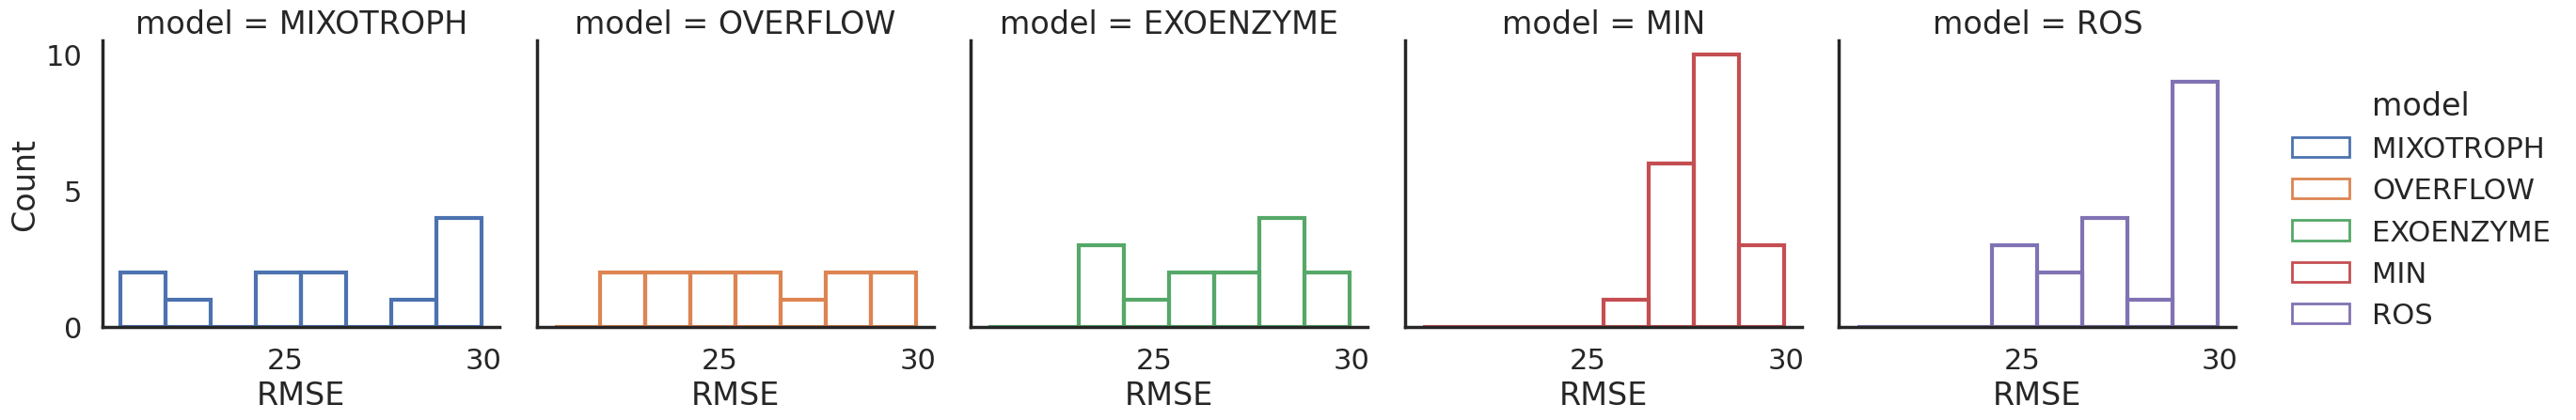

In [50]:
sns.displot(data=df.loc[df.RMSE < 30], x='RMSE', hue='model', fill=None, col='model')
#plt.xlim((20,30))

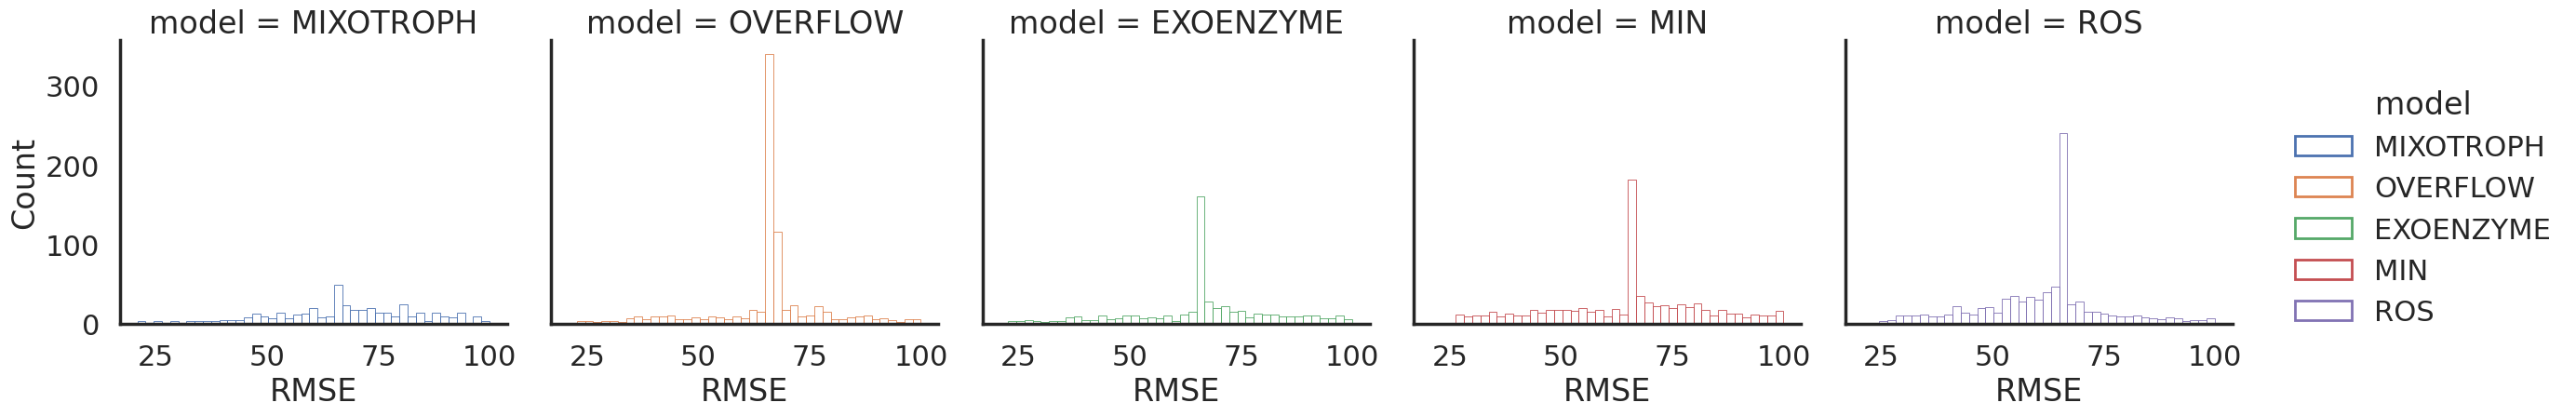

In [53]:
sns.displot(data=df.loc[df.RMSE < 100], x='RMSE', hue='model', fill=None, col='model')


In [54]:
df.loc[df.RMSE < 100, 'error_bin'] = '60-100'
df.loc[df.RMSE < 60, 'error_bin'] = '30-60'
df.loc[df.RMSE < 30, 'error_bin'] = '20-30'


In [55]:
df.columns

Index(['Mp', 'gammaDp', 'E_leakp', 'KONp', 'KINp', 'KOCp', 'KICp', 'VmaxONp',
       'VmaxINp', 'VmaxOCp', 'VmaxICp', 'SSE', 'model', 'gamma_DON2DINp',
       'E_ROSp', 'omegaP', 'RMSE', 'error_bin'],
      dtype='object')

In [58]:
mdf = df.loc[df.RMSE < 100].melt( id_vars=['SSE', 'model', 'RMSE', 'error_bin'])

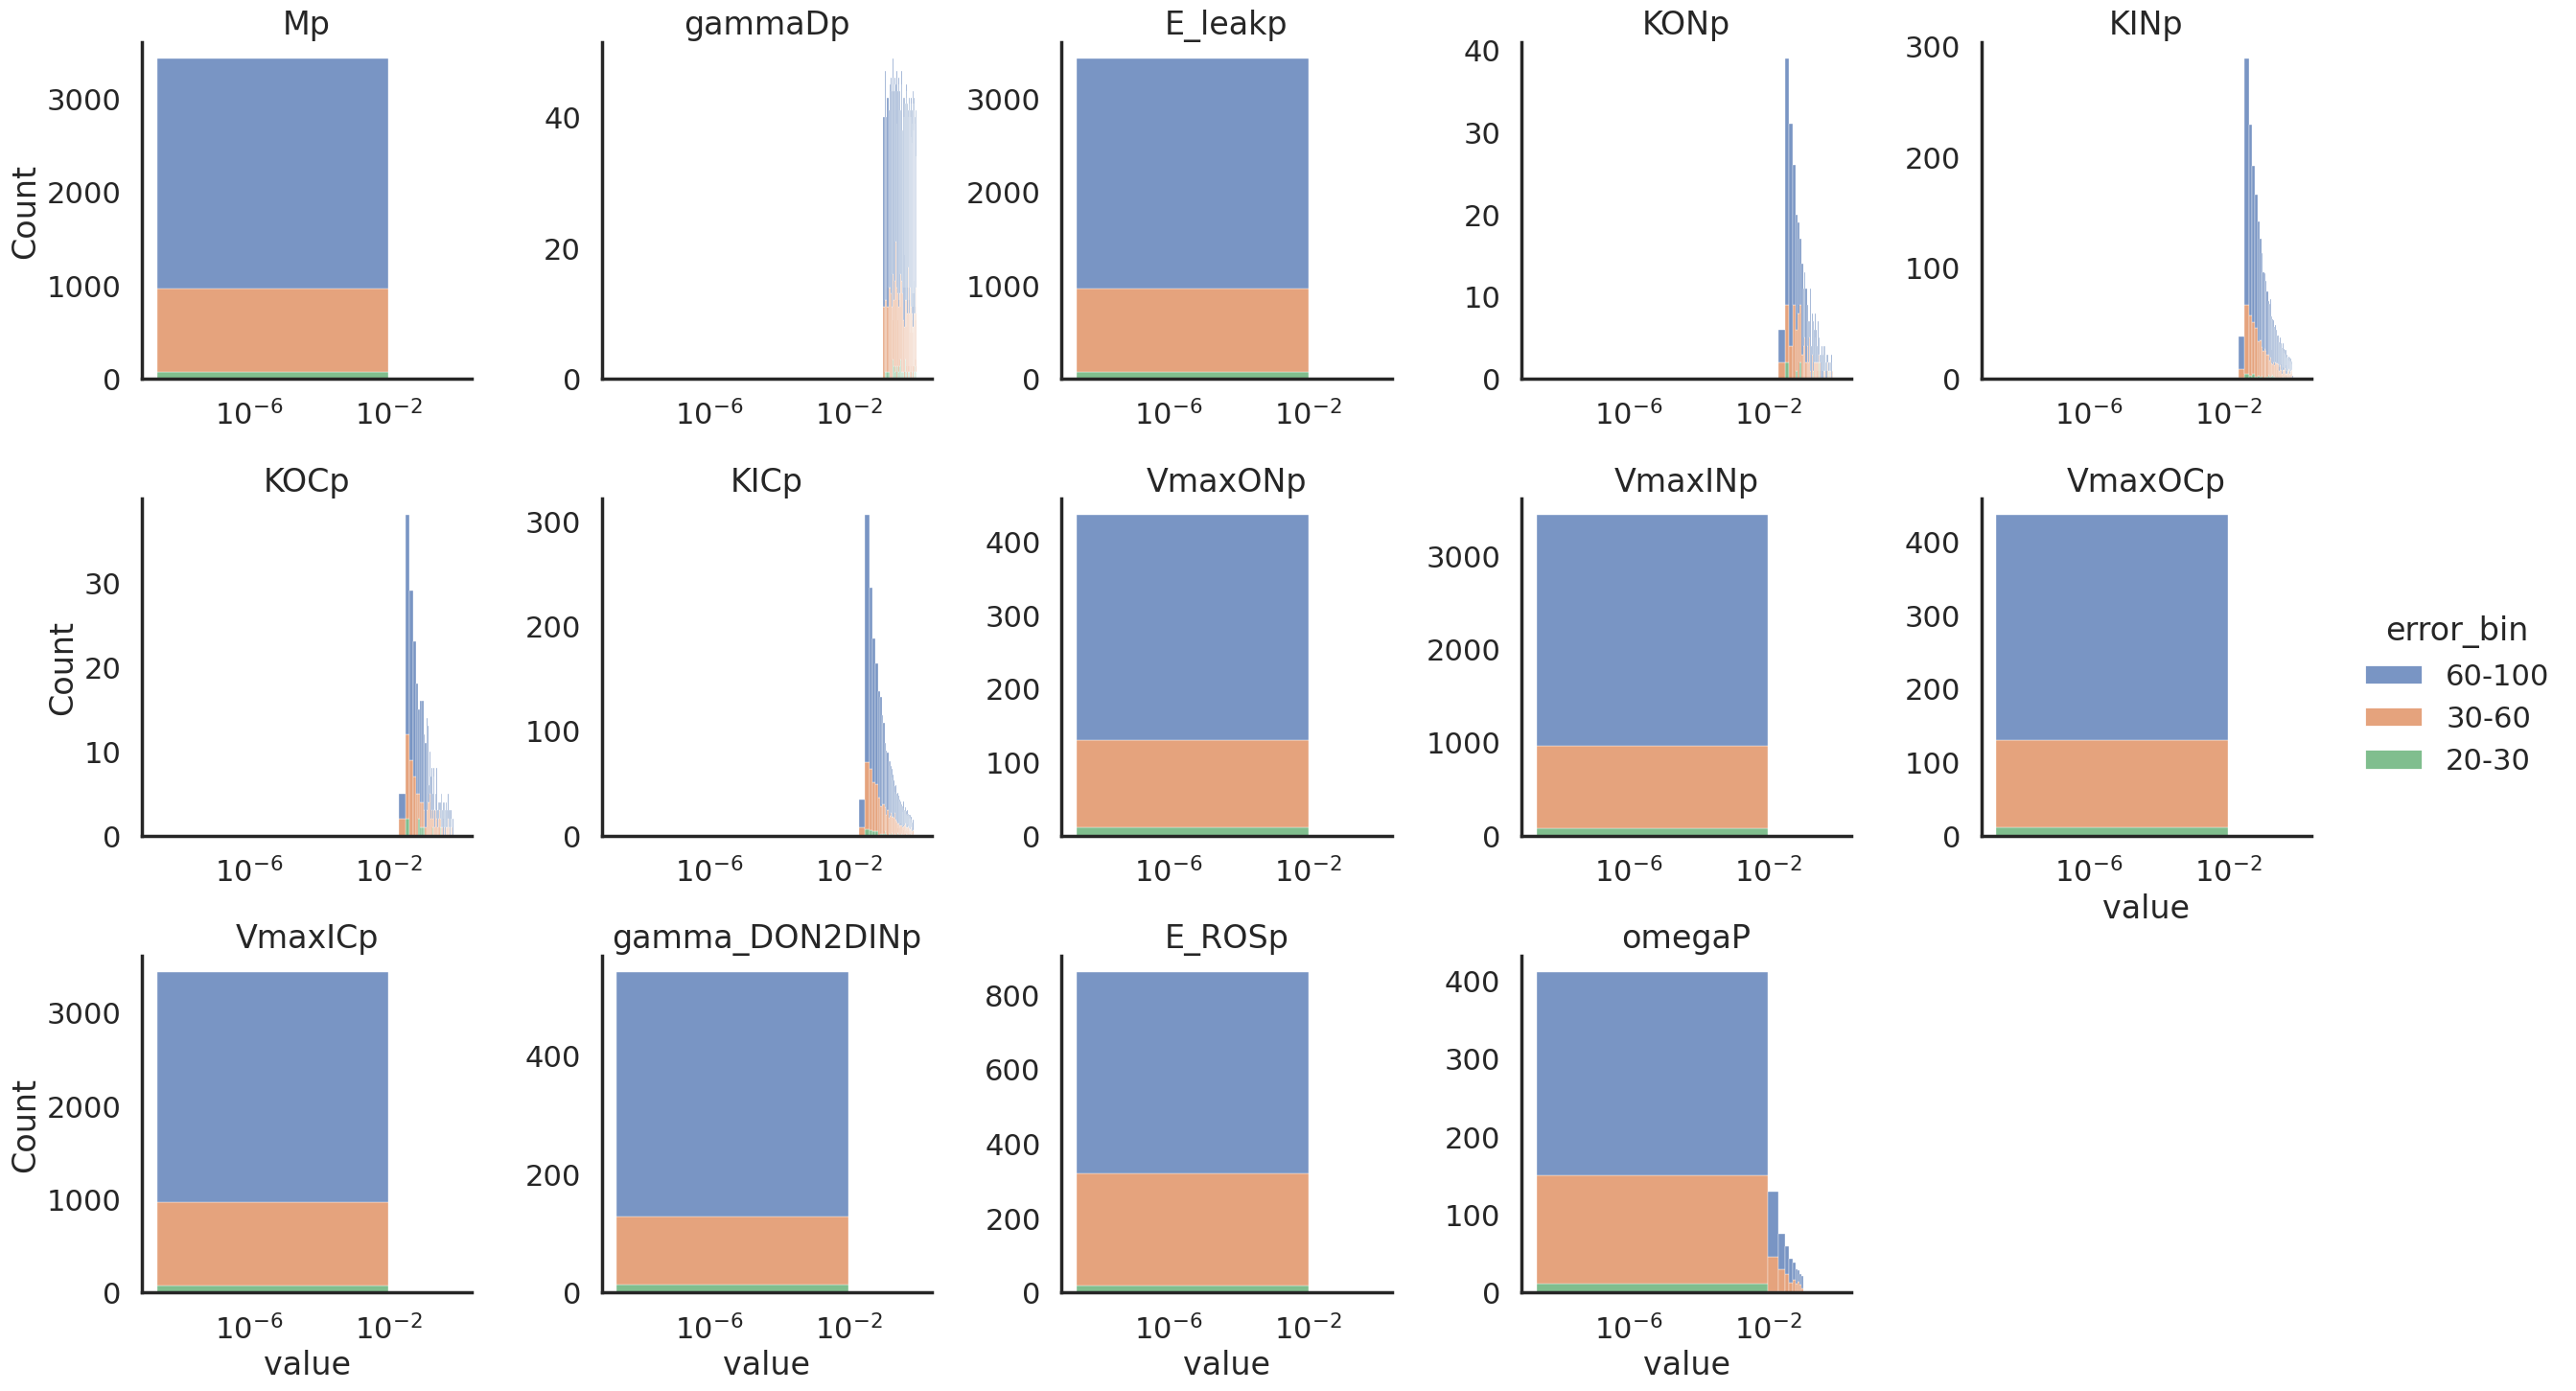

In [67]:
sns.displot(data=mdf, x='value', col='variable', #row='model',
            hue='error_bin', col_wrap=5,#sharex=False,
            facet_kws=dict(sharex=False, sharey=False), multiple='stack',
           # fill=None, 
           ).set(xscale='log').set_titles(col_template='{col_name}')


In [75]:
df['rank'] = df.groupby("model")["RMSE"].transform("rank")

In [96]:
min_rows = df.loc[df['rank'].le(50)]
min_rows

,Mp,gammaDp,E_leakp,KONp,KINp,KOCp,KICp,VmaxONp,VmaxINp,VmaxOCp,VmaxICp,SSE,model,gamma_DON2DINp,E_ROSp,omegaP,RMSE,error_bin,rank
28,0.000003,0.850003,4.636119e-06,0.077097,0.348302,0.243838,0.138073,0.000007,0.000031,0.000200,0.001309,697162.104662,MIXOTROPH,NaN,NaN,NaN,41.958436,30-60,37.0
51,0.000004,0.216180,2.974278e-06,0.576114,0.053739,0.039112,0.111593,0.000026,0.000065,0.000039,0.000297,428930.548519,MIXOTROPH,NaN,NaN,NaN,32.911365,30-60,16.0
91,0.000005,0.353307,8.080768e-07,0.325589,0.051450,0.284549,0.120626,0.000010,0.000035,0.000021,0.000424,190880.597791,MIXOTROPH,NaN,NaN,NaN,21.954993,20-30,2.0
126,0.000001,0.591045,2.881725e-06,0.085541,0.283136,0.589810,0.069912,0.000002,0.000055,0.000013,0.000403,778900.305012,MIXOTROPH,NaN,NaN,NaN,44.349971,30-60,44.0
180,0.000004,0.619792,3.906284e-06,0.688742,0.241515,0.277479,0.029848,0.000002,0.000036,0.000024,0.000345,695986.576589,MIXOTROPH,NaN,NaN,NaN,41.923047,30-60,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,0.000004,0.578812,3.384532e-07,NaN,0.111686,NaN,0.030077,NaN,0.000028,NaN,0.001030,243430.933062,ROS,NaN,1.950249e-07,0.023849,24.793640,20-30,3.0
5040,0.000003,0.174489,2.931750e-06,NaN,0.384568,NaN,0.413402,NaN,0.000061,NaN,0.000429,462225.746561,ROS,NaN,8.305722e-07,0.013785,34.164846,30-60,44.0
5080,0.000005,0.391876,1.030907e-06,NaN,0.491117,NaN,0.325188,NaN,0.000030,NaN,0.000581,377547.540472,ROS,NaN,2.399572e-06,0.001256,30.877223,30-60,23.0
5086,0.000001,0.409006,1.954267e-06,NaN,0.057284,NaN,0.076334,NaN,0.000054,NaN,0.000309,423441.356554,ROS,NaN,5.919005e-06,0.001997,32.700097,30-60,36.0


In [98]:
min_rows.columns

Index(['Mp', 'gammaDp', 'E_leakp', 'KONp', 'KINp', 'KOCp', 'KICp', 'VmaxONp',
       'VmaxINp', 'VmaxOCp', 'VmaxICp', 'SSE', 'model', 'gamma_DON2DINp',
       'E_ROSp', 'omegaP', 'RMSE', 'error_bin', 'rank'],
      dtype='object')

In [99]:
def write_json(x):
    fpath = os.path.join(dpath,f"pro_x0_{x['model']}_{x['rank']:g}.json")
    x = x.dropna()
    x= x.drop(['SSE', 'model',  'RMSE', 'error_bin', 'rank'])
    d = x.to_dict()
    params2json(d, fpath)
    print(fpath, d)

min_rows.apply(write_json, axis=1)
    

/fast_data/Osnat/RECYCLE_MODEL/results/shgo/out/pro_x0_MIXOTROPH_37.json {'Mp': 2.760823839763571e-06, 'gammaDp': 0.8500027604401111, 'E_leakp': 4.63611905068582e-06, 'KONp': 0.0770969007920176, 'KINp': 0.3483016581934989, 'KOCp': 0.2438379555375002, 'KICp': 0.138073037176524, 'VmaxONp': 7.49061037286846e-06, 'VmaxINp': 3.1188503677522386e-05, 'VmaxOCp': 0.0002001829967199, 'VmaxICp': 0.0013094432899841}
/fast_data/Osnat/RECYCLE_MODEL/results/shgo/out/pro_x0_MIXOTROPH_16.json {'Mp': 3.805979717205404e-06, 'gammaDp': 0.2161796323955059, 'E_leakp': 2.974277600986134e-06, 'KONp': 0.5761140756113942, 'KINp': 0.0537387512828903, 'KOCp': 0.0391122610394401, 'KICp': 0.1115931803377409, 'VmaxONp': 2.6229421544423136e-05, 'VmaxINp': 6.523152297179402e-05, 'VmaxOCp': 3.924904949759313e-05, 'VmaxICp': 0.0002973756047624}
/fast_data/Osnat/RECYCLE_MODEL/results/shgo/out/pro_x0_MIXOTROPH_2.json {'Mp': 5.011892642303526e-06, 'gammaDp': 0.353307431191206, 'E_leakp': 8.080768498975535e-07, 'KONp': 0.32

28      None
51      None
91      None
126     None
180     None
        ... 
5039    None
5040    None
5080    None
5086    None
5107    None
Length: 250, dtype: object